In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Loading Boston Data

In [2]:
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Loading data into X and Class labels into Y

In [4]:
X = boston.data
Y = boston.target

In [5]:
df=pd.DataFrame(X)
X=df.as_matrix()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Splitting the data using 80:20 scheme

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [7]:
# standardaising data
scaler  = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [8]:
df_train=pd.DataFrame(x_train)
df_train['PRICE']=y_train

df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,-0.276470,-0.507766,-0.402012,-0.272888,-0.118484,-0.848834,0.963877,-0.022455,-0.636453,-0.583618,1.175619,-0.000302,0.835288,13.1
1,-0.407464,3.331365,-1.431888,3.664502,-1.314148,2.361809,-1.516597,0.999022,-0.981745,-1.231926,-2.202859,0.412907,-1.325495,50.0
2,8.064832,-0.507766,1.078157,-0.272888,1.112090,-0.478931,1.140549,-0.988813,1.665490,1.551633,0.810378,-3.849276,1.158196,8.8
3,-0.403977,-0.507766,0.161225,-0.272888,0.186977,-0.243407,0.317257,-0.752702,-0.981745,-0.785842,1.175619,0.428424,-0.483373,20.6
4,0.696610,-0.507766,1.078157,-0.272888,1.234274,0.166954,1.140549,-1.068474,1.665490,1.551633,0.810378,0.194665,1.114099,12.1


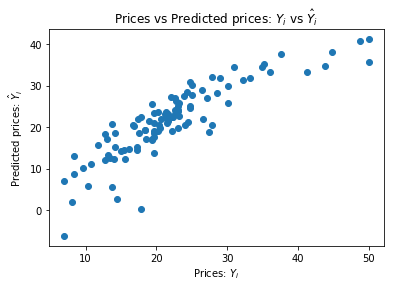

In [10]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

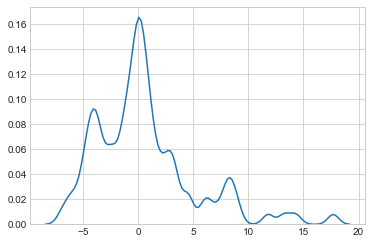

In [11]:
delta_y = y_test - y_pred;

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


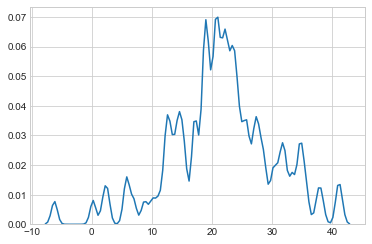

In [12]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

Our implementation of sgd regressor

In [13]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

In [15]:
for i in range(20):
    y_current = (m_current * X) + b_current
    cost = sum([data**2 for data in (y-y_current)]) / N
    m_gradient = -(2/N) * sum(X * (y - y_current))
    b_gradient = -(2/N) * sum(y - y_current)
    m_current = m_current - (learning_rate * m_gradient)
    b_current = b_current - (learning_rate * b_gradient)

NameError: name 'm_current' is not defined

In [67]:
#SGD implementation for linear regression

W,B,iteration,rate,k = np.zeros(shape=(1,13)),0,750,0.1,25 #intialise W and B to zero


while iteration>=0 :
    w,b,delta_w,delta_b = W,B,np.zeros(shape=(1,13)),0
    data = df_train.sample(25)                #sampling random k=batch size=20 data
    x = np.array(data.drop('PRICE',axis=1))
    y = np.array(data['PRICE'])
    
    for i in range(25):
        delta_w += (-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))   #partial differentiation wrt w 
        delta_b += (-2)*(y[i]-(np.dot(w,x[i])+b))        #partial differentiation wrt b 
        
    W=(w-rate*(delta_w)/k)
    B=(b-rate*(delta_b)/k)
    
    rate = rate/1.01
    iteration-=1
    
    
print(W)
print(B)       


[[-1.07422688  1.08020469 -0.27064925  0.82836113 -1.70461634  2.49358007
  -0.15126247 -3.19234351  2.49732179 -1.36096905 -1.99745611  1.06086766
  -4.11716864]]
[22.74675212]


In [68]:
#prediction on x_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic=[]
for i in range(len(x_test)):
    val=np.dot(W,x_test[i])+B  #val= wTx+b
    y_predic.append(np.asscalar(val))

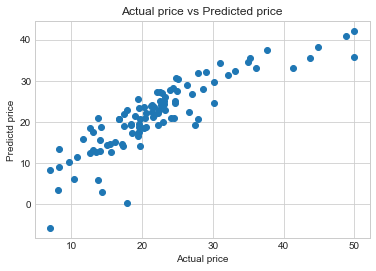

In [69]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_predic)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


In [70]:
MSE_lr=mean_squared_error(y_test,y_predic)
print('mean squared error =',MSE_lr)

mean squared error = 20.65873224554908


In built sklearn implementation of sgdregressor

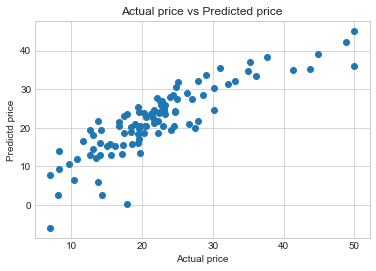

In [71]:
#SGD regression sklearn implementation

model=SGDRegressor(learning_rate='constant',eta0=0.01,penalty=None,max_iter=100)
model.fit(x_train,y_train)
y_pred_sgd=model.predict(x_test)

#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


In [72]:
MSE_sgd=mean_squared_error(y_test,y_pred_sgd)
print('mean squared error =',MSE_sgd)

mean squared error = 21.42882223955226


In [74]:
#Comparison between weights obtained from own implementation and weights obtained from sgd implementation
from prettytable import PrettyTable    
pt = PrettyTable()
pt.field_names=['Weight vector manual','Weight vector SGD sklearn']
weight_sgd=model.coef_
for i in range(13):
    pt.add_row([W[0][i],weight_sgd[i]])
print(pt)


+----------------------+---------------------------+
| Weight vector manual | Weight vector SGD sklearn |
+----------------------+---------------------------+
| -1.0742268830153774  |    -1.0814436969619463    |
|  1.0802046933986134  |     1.2186197394107143    |
| -0.2706492522496202  |     0.3347283550663289    |
|  0.8283611307986145  |     1.0990377545782293    |
| -1.7046163410427286  |    -1.7143672837622372    |
|  2.4935800735761005  |     2.5737039126860775    |
| -0.15126247088004796 |   -0.044158347456554795   |
| -3.1923435055807774  |     -3.42950094184944     |
|  2.4973217928950686  |     3.1829729279890917    |
| -1.3609690514959618  |    -2.0517136506922613    |
| -1.9974561076490327  |    -2.3067492679999453    |
|  1.0608676597211895  |     1.0587783850521952    |
|  -4.117168642152379  |     -4.366105882172545    |
+----------------------+---------------------------+


### Conclusion

Here we are getting desired results as both values of mean square error from SGDRegressor and our implementation of sgdregressor are similar and close to each other.